# Spot Curve Linear Interpolation

#### This program is for deriving spot curve using linear interpolation.

1. The initial spot rate data is estimated using coupon rate of bonds whose price are very close to par value. 
2. Use linear interpolated coupon values as the coupon rates of bonds at missing dates.
3. Calculate spot rate by bootstrap

#### 1. import data

In [2]:
import pandas as pd

adrs = "/Users/wanqiwang/Desktop/tbond.csv"
spotrate = pd.read_csv(adrs)

spotrate['Year'] = spotrate.Maturity.str[5:9].astype('int64')
spotrate['Month'] = spotrate.Maturity.str[0].astype('int64')
spotrate['n'] = (spotrate.Year-2020)*2+(spotrate.Month-2)/6 + 1
spotrate['n'] = spotrate.n.astype('int64')
spotrate.Coupon = spotrate.Coupon.astype('float64')
spotrate.sort_values('n',inplace=True)

rate = spotrate[['Maturity','Coupon','Ask Price','Year','Month','n']]
rate.reset_index(inplace=True, drop=True)
rate


,Maturity,Coupon,Ask Price,Year,Month,n
0,2/15/2020,1.375,100.000000,2020,2,1
1,8/15/2020,1.500,99.984375,2020,8,2
2,2/28/2021,1.125,99.613281,2021,2,3
3,8/31/2021,1.500,100.132812,2021,8,4
4,2/28/2022,1.750,100.789062,2022,2,5
5,8/15/2022,1.500,100.390625,2022,8,6
6,2/28/2023,1.500,100.507812,2023,2,7
7,8/31/2023,1.375,100.140625,2023,8,8
8,8/31/2024,1.250,99.562500,2024,8,10
9,8/15/2026,1.500,100.437500,2026,8,14


#### 2. linear interpolate coupon rate

In [3]:
for i in range(20): # i=6;rate.n[10] 
    if i+1 in list(rate.n):
        continue
    rate.loc[-1] = ['/',rate.Coupon[i-1]+(rate.Coupon[i]-rate.Coupon[i-1])/(rate.n[i]-rate.n[i-1]),
                   '/',int((i+1)/2)+2020,((i+2)%2)*6+2,i+1]
    rate.index += 1
    rate = rate.sort_values('n') 
    rate = rate.reset_index().iloc[:,1:]

rate.index+=1
rate2=pd.DataFrame(data=rate)
rate2

/Users/wanqiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Maturity,Coupon,Ask Price,Year,Month,n
1,2/15/2020,1.375000,100,2020,2,1
2,8/15/2020,1.500000,99.9844,2020,8,2
3,2/28/2021,1.125000,99.6133,2021,2,3
4,8/31/2021,1.500000,100.133,2021,8,4
5,2/28/2022,1.750000,100.789,2022,2,5
6,8/15/2022,1.500000,100.391,2022,8,6
7,2/28/2023,1.500000,100.508,2023,2,7
8,8/31/2023,1.375000,100.141,2023,8,8
9,/,1.312500,/,2024,2,9
10,8/31/2024,1.250000,99.5625,2024,8,10


#### 3. calculate spot rate

In [4]:
rate2['spot']=rate2.Coupon[rate2.Maturity!='/']
for i in range(1,20):  #i=3;j=2
    if pd.isnull(rate2.spot[i]):
        t = 100 - sum([rate2.Coupon[i]/2/(1+rate2.spot[j]/200)**rate2.n[j] for j in range(1,i)])
        rate2.spot[i]=200*(((100+rate2.Coupon[i]/2)/t)**(1/i)-1)
rate2

/Users/wanqiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Maturity,Coupon,Ask Price,Year,Month,n,spot
1,2/15/2020,1.375000,100,2020,2,1,1.375000
2,8/15/2020,1.500000,99.9844,2020,8,2,1.500000
3,2/28/2021,1.125000,99.6133,2021,2,3,1.125000
4,8/31/2021,1.500000,100.133,2021,8,4,1.500000
5,2/28/2022,1.750000,100.789,2022,2,5,1.750000
6,8/15/2022,1.500000,100.391,2022,8,6,1.500000
7,2/28/2023,1.500000,100.508,2023,2,7,1.500000
8,8/31/2023,1.375000,100.141,2023,8,8,1.375000
9,/,1.312500,/,2024,2,9,1.308265
10,8/31/2024,1.250000,99.5625,2024,8,10,1.250000


#### 4. plot

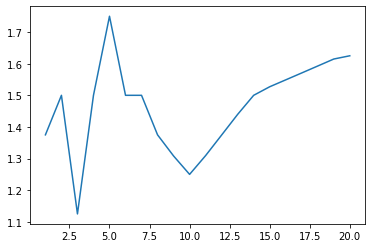

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(rate2.spot) 

In [6]:
rate2.to_csv('SpotCurveLinear.csv')